360
360


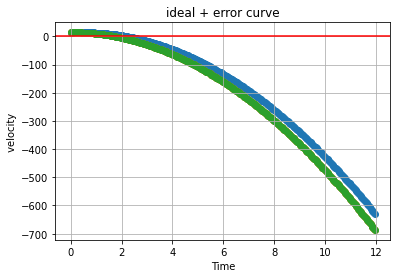

In [145]:
import pandas 
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plot
def dist(t):
  r=15-0.5*9.8*((t)**2) #R=Height-1/2*at^2
  # if(r<=0):
  #   return 0
  return r

def dist_low(t):
  r=15-0.5*9.8*((t+0.5)**2) # Lower bound
  # if(r<=0):
  #   return 0
  return r

def dist_high(t):
  r=15-0.5*9.8*((t-0.5)**2) # Upper bound
  # if(r<=0):
  #   return 0
  return r


time = np.arange(0, 12, 1/30)
print(len(time)) 
l=[]
l_low=[]
l_high=[]
print(len(time))
for i in time:
  l.append(dist(i)) # actual refrence Curve
for i in time:
  l_low.append(dist_low(i)) # lower refrence Curve
for i in time:
  l_high.append(dist_high(i)) # upper refrence Curve
#amplitude   = np.sin(time)
dist_value=np.array(l)
dist_low_value=np.array(l_low)
dist_high_value=np.array(l_high) # converting to np array
plot.scatter(time, dist_high_value) 
plot.scatter(time, dist_low_value)
plot.scatter(time, dist_value)
plot.title('ideal + error curve') # simply plotting

plot.xlabel('Time')

plot.ylabel(' velocity ')
plot.grid(True, which='both')
plot.axhline(y=0, color='red')
plot.show()
# Displaying the curve 

plot.show()

In [126]:
from google.colab import files
uploaded = files.upload() # 5 video clips

Saving Unscaled_data_8.csv to Unscaled_data_8 (1).csv
Saving Unscaled_data_9.csv to Unscaled_data_9 (1).csv
Saving Unscaled_data_10.csv to Unscaled_data_10 (1).csv
Saving Unscaled_data_11.csv to Unscaled_data_11 (2).csv
Saving Unscaled_data_12.csv to Unscaled_data_12 (1).csv


In [157]:
dataname="Unscaled_data_11.csv"
dataframe = pandas.read_csv(dataname)
print((dataframe))
print(dataframe.columns)

      SR      Head_x      Head_y  ...  rightKnee_y  rightAnkle_x  rightAnkle_y
0      1  310.432508   49.348431  ...   304.222833    361.369029    382.559627
1      2  311.043979   47.253682  ...   302.546553    359.560781    383.463913
2      3  313.462100   47.719330  ...   309.036688    359.446559    390.174290
3      4  316.743040   49.370287  ...   308.102204    357.892441    388.746105
4      5  318.867034   49.323971  ...   304.854153    364.828862    385.336906
..   ...         ...         ...  ...          ...           ...           ...
126  126  232.366169  369.314020  ...   448.943666    533.031721    477.708885
127  127  237.552245  366.110324  ...   446.509993    548.981910    475.230805
128  128  237.244100  366.567344  ...   447.682412    540.812140    477.421728
129  129  237.982266  365.933978  ...   448.309537    538.093228    475.859583
130  130  237.782543  366.621770  ...   449.520793    538.082309    478.654738

[131 rows x 27 columns]
Index(['SR', 'Head_x', 'Hea

In [158]:
df_only_fall = pandas.DataFrame(np.array([[0 for i in range(27)]]),columns=dataframe.columns)
l=[]

#In the dataset we didn't had direct head joint 
#We had the ear,nose and eye joint
#so we took the mean of all and considered as head joint


for row in dataframe.values:
  # if(row[-1]==0): continue
  df_temp = pandas.DataFrame(np.array([row]),columns=dataframe.columns)
  df_only_fall=df_only_fall.append(df_temp, ignore_index = True)
  #df_only_fall=df_only_fall.append(np.array(row))\
df_only_fall=df_only_fall.drop(0,axis=0)
# after this complete for loop we get data of only fall frames and stored in df_only_fall variable 
print(df_only_fall,len(df_only_fall))

        SR      Head_x      Head_y  ...  rightKnee_y  rightAnkle_x  rightAnkle_y
1      1.0  310.432508   49.348431  ...   304.222833    361.369029    382.559627
2      2.0  311.043979   47.253682  ...   302.546553    359.560781    383.463913
3      3.0  313.462100   47.719330  ...   309.036688    359.446559    390.174290
4      4.0  316.743040   49.370287  ...   308.102204    357.892441    388.746105
5      5.0  318.867034   49.323971  ...   304.854153    364.828862    385.336906
..     ...         ...         ...  ...          ...           ...           ...
127  126.0  232.366169  369.314020  ...   448.943666    533.031721    477.708885
128  127.0  237.552245  366.110324  ...   446.509993    548.981910    475.230805
129  128.0  237.244100  366.567344  ...   447.682412    540.812140    477.421728
130  129.0  237.982266  365.933978  ...   448.309537    538.093228    475.859583
131  130.0  237.782543  366.621770  ...   449.520793    538.082309    478.654738

[131 rows x 27 columns] 131

In [159]:
sub_list=[]
for i in range(len(df_only_fall.values)-2):
  sub_list.append(abs(df_only_fall.values[i][2]-df_only_fall.values[i+1][2]))
sub_list.append(1)
sub_list.append(1)
print(len(sub_list))
# print(len(df_only_fall['SN']))

131


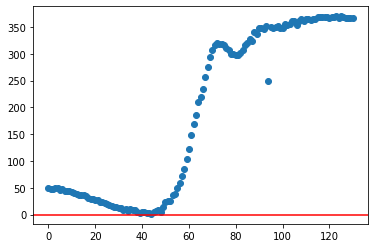

In [160]:
# plot of y coordinate

# print(df_only_fall['SN']) # fram no.
srno=[ i for i in range(len(df_only_fall.values))]
srno=np.array(srno)

plot.scatter(srno, df_only_fall['Head_y'])# pplot of frame number to y cordinate
plot.axhline(y=0, color='red')

plot.show()

In [161]:
ideal_slope=[]
for i in range(len(l_low)-1):
  ideal_slope.append((l_low[i]-l_low[i+1])/(time[i+1]-time[i]))
print(len(ideal_slope))
print(ideal_slope)
# calculating the slope of idea curve. this we'll need for matching the testing curve

359
[0.16333333333333755, 0.49000000000001265, 0.8166666666666343, 1.143333333333363, 1.4699999999999849, 1.7966666666666586, 2.1233333333333353, 2.4500000000000104, 2.7766666666666855, 3.1033333333333077, 3.429999999999983, 3.756666666666705, 4.083333333333333, 4.410000000000008, 4.73666666666663, 5.063333333333358, 5.38999999999998, 5.716666666666655, 6.043333333333331, 6.370000000000006, 6.696666666666681, 7.0233333333333565, 7.349999999999978, 7.676666666666681, 8.003333333333329, 8.330000000000004, 8.656666666666679, 8.9833333333333, 9.309999999999976, 9.636666666666704, 9.963333333333306, 10.29000000000002, 10.616666666666694, 10.943333333333282, 11.270000000000042, 11.59666666666666, 11.923333333333337, 12.250000000000014, 12.576666666666632, 12.903333333333393, 13.229999999999928, 13.556666666666692, 13.88333333333333, 14.20999999999999, 14.536666666666678, 14.863333333333397, 15.189999999999971, 15.5166666666667, 15.84333333333332, 16.169999999999995, 16.496666666666616, 16.82

In [162]:
# testing data of slope - grp of 10 each
test_list=[] # slope of all the testing curve points. example if we have continuos 20 fall frame then this variable we contain 19 slopes.
temp=[] # this will contain the group of 10 each . ex if we have 19 slopes then it will contain 1:5,2:6,.....,14:19
for i in range(0,len(df_only_fall.values)-1):
  slope=(df_only_fall.values[i+1][2]-df_only_fall.values[i][2])/(srno[i+1]-srno[i])
  temp.append(slope)
i=0
while(i+10<len(temp)):
  test_list.append(temp[i:i+10])
  i+=1
print(test_list)
print(len(test_list)) 

[[-2.094749043178844, 0.4656474625675102, 1.650957036796612, -0.04631559997355339, -2.8109111283582635, 0.6085149612200382, -3.8689180708072968, -0.11352552645990954, 1.2790479009158489, -3.199672574459278], [0.4656474625675102, 1.650957036796612, -0.04631559997355339, -2.8109111283582635, 0.6085149612200382, -3.8689180708072968, -0.11352552645990954, 1.2790479009158489, -3.199672574459278, -1.8308191837118315], [1.650957036796612, -0.04631559997355339, -2.8109111283582635, 0.6085149612200382, -3.8689180708072968, -0.11352552645990954, 1.2790479009158489, -3.199672574459278, -1.8308191837118315, -0.6077313805192404], [-0.04631559997355339, -2.8109111283582635, 0.6085149612200382, -3.8689180708072968, -0.11352552645990954, 1.2790479009158489, -3.199672574459278, -1.8308191837118315, -0.6077313805192404, -1.7280993631402595], [-2.8109111283582635, 0.6085149612200382, -3.8689180708072968, -0.11352552645990954, 1.2790479009158489, -3.199672574459278, -1.8308191837118315, -0.607731380519240

In [163]:
# mating with idea the testing data
TotalPositive=0
for i in test_list:
  fall=0
  for j in i:
    for k in ideal_slope:
      if(k-1<=j<=k+1): # as we are dealing we the fall cases and fall cases have slope inclined toward y_axis and we know slope is tan(teta) which highly vary with small change in x coordinate
      # so once again cause of this we added 1 as the error!.
        fall+=1
        # print("Suspected Fall")
        break
  if(fall>=10): # if strictly 10 frane have similar nature we say suspected a fall.
    print("Suspected Fall")
    # print(i)
    TotalPositive+=1
  fall=0
print(TotalPositive)

Suspected Fall
Suspected Fall
Suspected Fall
Suspected Fall
Suspected Fall
Suspected Fall
Suspected Fall
Suspected Fall
Suspected Fall
Suspected Fall
Suspected Fall
Suspected Fall
Suspected Fall
Suspected Fall
Suspected Fall
Suspected Fall
16


131


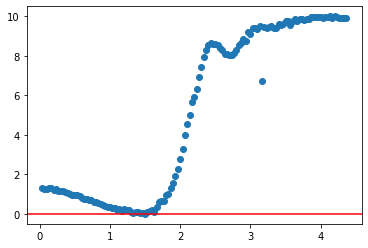

In [164]:
#scaled ploting of testing
df_only_fall['Head_y']=((df_only_fall['Head_y']-min(df_only_fall['Head_y']))/(max(df_only_fall['Head_y'])-min(df_only_fall['Head_y'])))*10

print(len(df_only_fall['Head_y']))

t=1/30
test_time_x_axis=[]

for i in df_only_fall['Head_y']:
  test_time_x_axis.append(t)
  t+=(1/30)

plot.scatter(test_time_x_axis, df_only_fall['Head_y'])
plot.axhline(y=0, color='red')

plot.show()